### Diamond prices

Dataset from Kaggle: https://www.kaggle.com/shivam2503/diamonds

### Problem definition

Predicting diamond prices by their cut, color, clarity and othe attributes.

### Data

This dataset contains prices and other attributes of about 54,000 diamonds. The data is gathered in one CSV file.

Feature description:

* **carat** - weight of the diamond (0.2--5.01)

* **cut** - quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* **color** - diamond colour, from J (worst) to D (best)

* **clarity** - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* **depth** - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* **table** - width of top of diamond relative to widest point (43--95)

* **price** - price in US dollars (326-18,823 US Dollars)

* **x** - length in mm (0--10.74)

* **y** - width in mm (0--58.9)

* **z** - depth in mm (0--31.8)



The dataset can be downloaded from: https://www.kaggle.com/shivam2503/diamonds

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

### Load the data

In [2]:
df = pd.read_csv("diamonds.csv", index_col=[0])

### Data exploration (EDA)

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [ ]:
#

In [5]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
for label, content in df.items():
    if pd.api

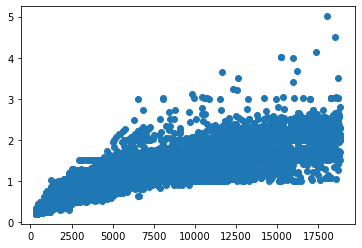

In [6]:
fig, ax = plt.subplots()
ax.scatter(df.price, df.carat);

### Filling and turning categorical variables into numbers

In [7]:
# Check for columns which aren't numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

cut
color
clarity


In [8]:
# Turning categorical variables into numbers
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes+1

In [9]:
pd.Categorical(df["cut"]).codes, pd.Categorical(df["color"]).codes, pd.Categorical(df["clarity"]).codes,  

(array([2, 3, 1, ..., 4, 3, 2], dtype=int8),
 array([1, 1, 1, ..., 0, 4, 0], dtype=int8),
 array([3, 2, 4, ..., 2, 3, 3], dtype=int8))

In [10]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,3,2,4,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,6,6,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,7,4,63.3,58.0,335,4.34,4.35,2.75


In [11]:
### Save preprocessed data
df.to_csv("df_prep.csv")

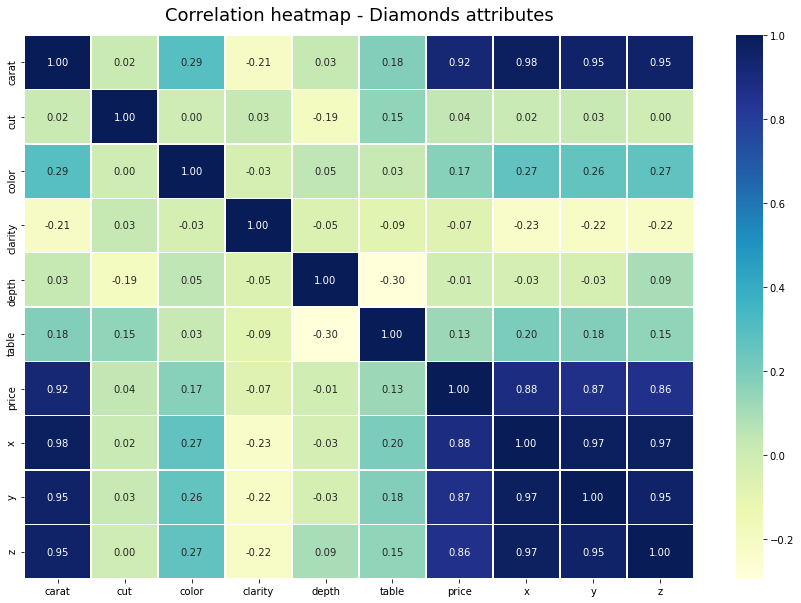

In [12]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Correlation heatmap - Diamonds attributes', fontdict={'fontsize':18}, pad=15)
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

### As we can see on the correlation matrix there is a strong positive correlation between price and weight (carat) and price and size (x, y, z) of a diamond. The other attributes don't have strong positive or negative correlation. On other features we should focus when comparing diamonds with similar size and weight.

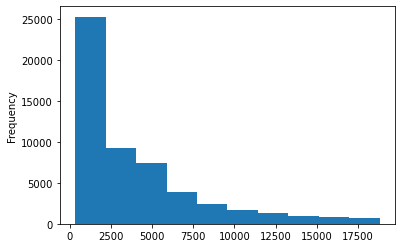

In [13]:
df.price.plot.hist();

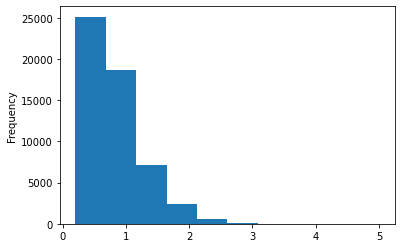

In [14]:
df.carat.plot.hist();

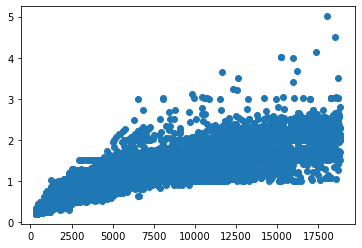

In [15]:
fig, ax = plt.subplots()
ax.scatter(df.price, df.carat);

### Modeling

In [16]:
X = df.drop("price", axis=1)
y = df["price"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43152, 9), (10788, 9), (43152,), (10788,))

### We're going to try different machine learning models:
1. Linear Regression
2. Lasso
3. ElasticNet

In [19]:
model = {"Linear Regression": LinearRegression(),
         "Lasso": Lasso(),
         "ElasticNet": ElasticNet(),
         "RandomForestRegressor": RandomForestRegressor()}

def fit_and_evaluate(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates machine learning models.
    models: a dictionary with machine learning models to be used
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # Make an empty dictionary to keep model scores
    model_scores = {}
    # Looping through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [20]:
model_scores = fit_and_evaluate(models = model,
                                X_train = X_train,
                                X_test = X_test,
                                y_train = y_train,
                                y_test = y_test)
model_scores

{'Linear Regression': 0.8850340164572263,
 'Lasso': 0.8849001516168786,
 'ElasticNet': 0.7941001496258544,
 'RandomForestRegressor': 0.9814901074244068}

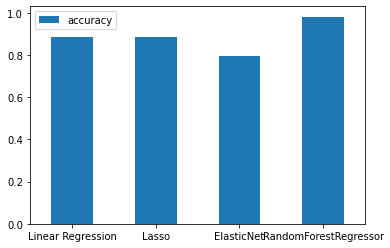

In [21]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0);